https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-9-neural-networks-with-tfidf-vectors-using-d0b4af6be6d7

In [1]:
import numpy as np
import pandas as pd



from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
#from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
from utils import open_by_tweets
from nltk.stem import WordNetLemmatizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from utils import create_csv_submission
from sklearn.feature_extraction.text import CountVectorizer
SEED = 15432

In [19]:
MAX_FEATURES = 100000

In [25]:
train_set = pd.read_pickle("./data/tweets.pkl")
del train_set['tweet_len']


x = train_set.tweet
y = train_set.label

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.3, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)
#x_validation_tfidf, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=.5, random_state=SEED)

tvec = TfidfVectorizer(max_features=MAX_FEATURES,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(x_train)
x_validation_tfidf = tvec.transform(x_validation)


In [26]:
x_test_tfidf = tvec.transform(x_test)

In [27]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=MAX_FEATURES))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [28]:
model.fit(x_train_tfidf,y_train, batch_size =  32, epochs = 6, validation_data = (x_validation_tfidf, y_validation))

Train on 126924 samples, validate on 27198 samples
Epoch 1/6
126924/126924 [==============================] - 528s 4ms/step - loss: 0.4314 - accuracy: 0.7964 - val_loss: 0.3984 - val_accuracy: 0.8149
Epoch 2/6
126924/126924 [==============================] - 548s 4ms/step - loss: 0.2751 - accuracy: 0.8811 - val_loss: 0.4372 - val_accuracy: 0.8078
Epoch 3/6
126924/126924 [==============================] - 558s 4ms/step - loss: 0.1777 - accuracy: 0.9246 - val_loss: 0.5579 - val_accuracy: 0.7994
Epoch 4/6
126924/126924 [==============================] - 558s 4ms/step - loss: 0.1059 - accuracy: 0.9549 - val_loss: 0.7869 - val_accuracy: 0.7905
Epoch 5/6
126924/126924 [==============================] - 560s 4ms/step - loss: 0.0582 - accuracy: 0.9748 - val_loss: 1.0943 - val_accuracy: 0.7874
Epoch 6/6
126924/126924 [==============================] - 573s 5ms/step - loss: 0.0321 - accuracy: 0.9853 - val_loss: 1.3493 - val_accuracy: 0.7823


In [33]:
result = model.predict(x_test_tfidf)

In [29]:
# Testing for arbitrary threshold = 0.5
predictions = result.copy()
predictions[predictions < 0.5] = 0 #replace values < 0.5 to -1
predictions[predictions >= 0.5] = 1

#create_csv_submission([x for x in range(1,len(result)+1)],result,"test_s1.csv")
print(f'Our model\'s accuracy is {metrics.accuracy_score(y_test, predictions)}')

Our model's accuracy is 0.7827125997279312


In [43]:
# Testing for threholds ranging from 0 to 1 
thresholds = np.linspace(0.2, 0.6, 50)
predictions =[]
for t in thresholds:
    pred = result.copy()
    pred[pred < t] = 0 #replace values < 0.5 to -1
    pred[pred >= t] = 1
    predictions.append(metrics.accuracy_score(y_test, pred))
    #print(f'Our model\'s accuracy with a threshold of {t} is {metrics.accuracy_score(y_test, pred)}')

Text(0, 0.5, 'Validation set accuracy')

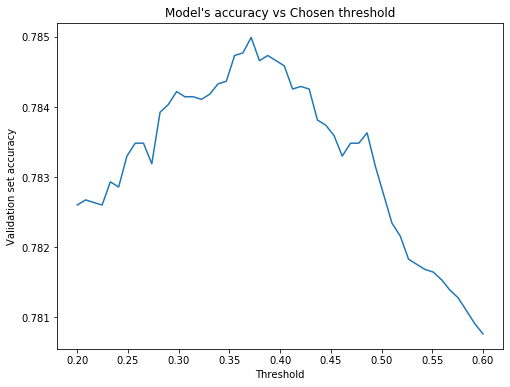

In [44]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, predictions)
plt.title("Model's accuracy vs Chosen threshold")
plt.xlabel("Threshold")
plt.ylabel("Validation set accuracy")
#plt.legend()

In [28]:
#normalize
# from sklearn.preprocessing import Normalizer
# norm = Normalizer().fit(x_train_tfidf)
# x_train_tfidf_norm = norm.transform(x_train_tfidf)
# x_validation_tfidf_norm = norm.transform(x_validation_tfidf)

In [31]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=MAX_FEATURES))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# model1.fit(x_train_tfidf_norm,y_train, batch_size =  32, epochs = 6,validation_data = (x_validation_tfidf_norm, y_validation))
model1.fit(x_train_tfidf,y_train, batch_size =  32, epochs = 6,validation_data = (x_validation_tfidf, y_validation))

Train on 126924 samples, validate on 27198 samples
Epoch 1/6
126924/126924 [==============================] - 464s 4ms/step - loss: 0.4305 - accuracy: 0.7962 - val_loss: 0.3963 - val_accuracy: 0.8161
Epoch 2/6
126924/126924 [==============================] - 490s 4ms/step - loss: 0.2928 - accuracy: 0.8704 - val_loss: 0.4263 - val_accuracy: 0.8112
Epoch 3/6
126924/126924 [==============================] - 476s 4ms/step - loss: 0.2143 - accuracy: 0.9075 - val_loss: 0.5014 - val_accuracy: 0.8059
Epoch 4/6
126924/126924 [==============================] - 426s 3ms/step - loss: 0.1508 - accuracy: 0.9389 - val_loss: 0.5982 - val_accuracy: 0.7999
Epoch 5/6
126924/126924 [==============================] - 419s 3ms/step - loss: 0.0992 - accuracy: 0.9623 - val_loss: 0.7537 - val_accuracy: 0.7946
Epoch 6/6
126924/126924 [==============================] - 422s 3ms/step - loss: 0.0631 - accuracy: 0.9765 - val_loss: 0.8984 - val_accuracy: 0.7909


In [32]:
x_test_tfidf_norm = norm.transform(x_validation_tfidf)

result1 = model1.predict(x_test_tfidf_norm)
result1[result1 < 0.5] = 0 #replace values < 0.5 to -1
result1[result1 >= 0.5] = 1
result1

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [48]:
x_validation_tfidf_norm.shape


(27198, 70000)

In [41]:
print(f'Our model\'s accuracy is {metrics.accuracy_score(y_test, result1)}')

Our model's accuracy is 0.5046694609897786


In [42]:
#learning rate
import keras
custom_adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_testing_2 = Sequential()
model_testing_2.add(Dense(64, activation='relu', input_dim=MAX_FEATURES))
model_testing_2.add(Dense(1, activation='sigmoid'))
model_testing_2.compile(optimizer=custom_adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_testing_2.fit(x_train_tfidf,y_train, batch_size =  32, epochs = 6, validation_data = (x_validation_tfidf, y_validation))

Train on 126924 samples, validate on 27198 samples
Epoch 1/6
126924/126924 [==============================] - 386s 3ms/step - loss: 0.4254 - accuracy: 0.7976 - val_loss: 0.3991 - val_accuracy: 0.8154
Epoch 2/6
126924/126924 [==============================] - 402s 3ms/step - loss: 0.2700 - accuracy: 0.8792 - val_loss: 0.4429 - val_accuracy: 0.8093
Epoch 3/6
126924/126924 [==============================] - 407s 3ms/step - loss: 0.1470 - accuracy: 0.9368 - val_loss: 0.6426 - val_accuracy: 0.7992
Epoch 4/6
126924/126924 [==============================] - 409s 3ms/step - loss: 0.0596 - accuracy: 0.9748 - val_loss: 1.0710 - val_accuracy: 0.7931
Epoch 5/6
126924/126924 [==============================] - 412s 3ms/step - loss: 0.0272 - accuracy: 0.9874 - val_loss: 1.4320 - val_accuracy: 0.7883
Epoch 6/6
126924/126924 [==============================] - 412s 3ms/step - loss: 0.0168 - accuracy: 0.9912 - val_loss: 1.6524 - val_accuracy: 0.7854


In [44]:
result2 = model_testing_2.predict(x_test_tfidf)
result2[result2 < 0.5] = 0 #replace values < 0.5 to -1
result2[result2 >= 0.5] = 1

#create_csv_submission([x for x in range(1,len(result)+1)],result,"test_s1.csv")
print(f'Our model\'s accuracy is {metrics.accuracy_score(y_test, result2)}')

Our model's accuracy is 0.7847347328945917


In [43]:
#increasing number of nodes
model_s_2 = Sequential()
model_s_2.add(Dense(128, activation='relu', input_dim=MAX_FEATURES))
model_s_2.add(Dense(1, activation='sigmoid'))
model_s_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_s_2.fit(x_train_tfidf,y_train, batch_size =  32, epochs = 5,validation_data = (x_validation_tfidf, y_validation))

Train on 126924 samples, validate on 27198 samples
Epoch 1/5
126924/126924 [==============================] - 700s 6ms/step - loss: 0.4294 - accuracy: 0.7969 - val_loss: 0.3976 - val_accuracy: 0.8168
Epoch 2/5
126924/126924 [==============================] - 708s 6ms/step - loss: 0.2859 - accuracy: 0.8729 - val_loss: 0.4331 - val_accuracy: 0.8081
Epoch 3/5
126924/126924 [==============================] - 713s 6ms/step - loss: 0.1939 - accuracy: 0.9144 - val_loss: 0.5536 - val_accuracy: 0.8003
Epoch 4/5
126924/126924 [==============================] - 717s 6ms/step - loss: 0.1171 - accuracy: 0.9502 - val_loss: 0.7628 - val_accuracy: 0.7969
Epoch 5/5
126924/126924 [==============================] - 722s 6ms/step - loss: 0.0629 - accuracy: 0.9729 - val_loss: 1.0469 - val_accuracy: 0.7944


In [54]:
result3 = model_s_2.predict(x_test_tfidf)
result3[result3 < 0.45] = 0 #replace values < 0.5 to -1
result3[result3 >= 0.45] = 1

#create_csv_submission([x for x in range(1,len(result)+1)],result,"test_s1.csv")
print(f'Our model\'s accuracy is {metrics.accuracy_score(y_test, result3)}')

Our model's accuracy is 0.7924188389279018


In [49]:
result3.shape

(27199, 1)

In [14]:
to_predict = pd.read_pickle("./data/tweets_test.pkl")
del to_predict['tweet_len']

to_predict.index += 1

to_predict = to_predict['tweet']
to_predict = to_predict.astype(str)

to_predict = tvec.transform(to_predict)





In [15]:
result = model.predict(to_predict)
result
#it returns values between [0,1] (since sigmoid is used) 
#result[result < 0.5] = -1 #replace values < 0.5 to -1
#result[result >= 0.5] = 1

array([[6.6459179e-06],
       [4.6879411e-02],
       [4.6760169e-01],
       ...,
       [0.0000000e+00],
       [9.6147847e-01],
       [9.0432167e-04]], dtype=float32)

In [16]:
result[result < 0.5] = -1 #replace values < 0.5 to -1
result[result >= 0.5] = 1
result

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [ 1.],
       [-1.]], dtype=float32)

In [17]:

create_csv_submission([x for x in range(1,len(result)+1)],result,"keras2.csv")